<a href="https://colab.research.google.com/github/OdysseusPolymetis/enssib_class/blob/main/1_Stylometry_bases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stylométrie de base**
---

Le notebook que vous voyez est majoritairement inspiré (légèrement modifié mais guère) de ce cours : https://programminghistorian.org/fr/lecons/introduction-a-la-stylometrie-avec-python. Je vous recommande par ailleurs grandement les cours du Programming Historian, qui sont vraiment très bien faits (et de tous niveaux).

Je me permets de faire une explication un peu plus courte, et peut-être moins exacte des bases, mais vous pouvez regarder sur la page source.

D'abord, nous prenons les Federalist Papers, et voilà ce que dit l'article du Programming Historian sur le sujet :
<br>"Les Federalist Papers (parfois simplement appelés le Fédéraliste) sont une collection de 85 articles fondamentaux de la théorie politique américaine, publiés entre octobre 1787 et mai 1788. Ces articles, rédigés alors que le débat sur la ratification de l'actuelle Constitution des États-Unis d'Amérique faisait rage, argumentent en faveur de cette ratification et du système de gouvernement sous lequel les Américains vivent depuis 1789.
Trois des hommes d'État les plus en vue de la jeune république américaine ont écrit les articles:

- Alexander Hamilton, qui fut le premier Secrétaire du Trésor (l'équivalent du ministre des Finances) des États-Unis.
- James Madison, quatrième Président des États-Unis, qui est parfois surnommé le “Père de la Constitution” en raison du rôle-clé qu'il a joué lors de la convention constitutionnelle de 1787 au cours de laquelle celle-ci a été rédigée.
- John Jay, premier juge en chef de la Cour suprême des États-Unis, second gouverneur de l'État de New York et diplomate.

Cependant, qui a écrit quel article au juste est resté un mystère pendant plus de 150 ans, et ce par la faute des auteurs eux-mêmes."

In [ ]:
!wget https://programminghistorian.org/assets/introduction-to-stylometry-with-python/stylometry-federalist.zip
!unzip stylometry-federalist.zip

In [2]:
articles = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Partages': [18, 19, 20],
    'Contestes': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'CasSpecial': [64]
}


Cette cellule définit une fonction utilitaire, `lire_fichiers_en_chaine`, dont le but est de **charger plusieurs fichiers texte** (ici, des textes du *Federalist*) et de **les concaténer** pour obtenir **une seule grande chaîne de caractères**.

#### Comment ça marche ?

- `noms_fichiers` : c'est une liste d'identifiants (par ex. `["hamilton", "madison"]`), qui servent à construire les noms de fichiers.
- `chaines = []` : on prépare une liste vide qui va stocker le contenu de chaque fichier.
- `for nom_fichier in noms_fichiers:` : on boucle sur chaque identifiant.
- `open(f'data/federalist_{nom_fichier}.txt', 'r')` : on ouvre le fichier correspondant dans le dossier `data/`.
  - L'expression `f'...'` est une **f-string** : elle permet d'insérer la valeur de `nom_fichier` dans le nom du fichier.
- `f.read()` : on lit **tout** le contenu du fichier en une fois, et on l'ajoute à la liste `chaines`.
- `return '\n'.join(chaines)` : on concatène tous les textes en insérant un **saut de ligne** (`\n`) entre eux, pour éviter de coller la fin d'un fichier avec le début du suivant.

#### Pourquoi c'est utile en stylométrie ?

En stylométrie, on veut souvent construire un **corpus** par auteur (ou par période, genre, etc.).  
Cette fonction permet donc de :

- **rassembler plusieurs textes** d'un même auteur,
- obtenir une **grande chaîne** prête à être tokenisée (mots), comptée, ou analysée (fréquences, longueurs, etc.).


In [3]:
def lire_fichiers_en_chaine(noms_fichiers):
    chaines = []
    for nom_fichier in noms_fichiers:
        with open(f'data/federalist_{nom_fichier}.txt', 'r') as f:
            chaines.append(f.read())
    return '\n'.join(chaines)

In [4]:
federalist_par_auteur = {}
for auteur, fichiers in articles.items():
    federalist_par_auteur[auteur] = lire_fichiers_en_chaine(fichiers)

In [ ]:
for articles_par_auteur in articles:
    print(federalist_par_auteur[articles_par_auteur][:100])

In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
auteurs = ("Hamilton", "Madison", "Contestes", "Jay", "Partages")

Dans cette cellule, on prépare des données **par auteur** pour pouvoir ensuite faire des statistiques stylométriques (fréquences, longueurs de mots, etc.).

In [10]:
federalist_par_auteur_occs = {}
federalist_par_auteur_dist_longueurs = {}
for auteur in auteurs:
    occs = nltk.word_tokenize(federalist_par_auteur[auteur])

    federalist_par_auteur_occs[auteur] = ([occ for occ in occs
                                            if any(c.isalpha() for c in occ)])

La cellule qui suit calcule, **pour chaque auteur**, la distribution des **longueurs de tokens** (en nombre de caractères) et l'affiche sous forme de graphique.

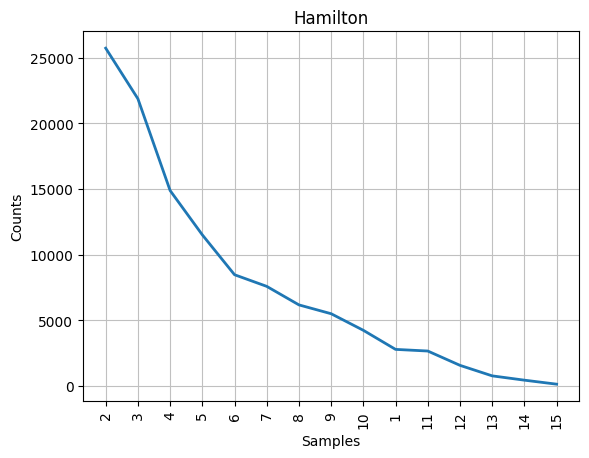

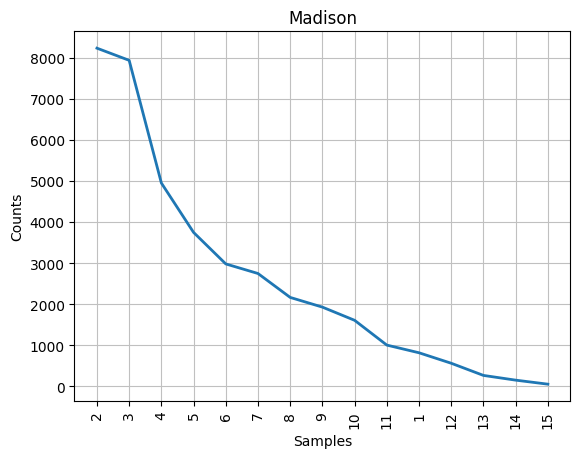

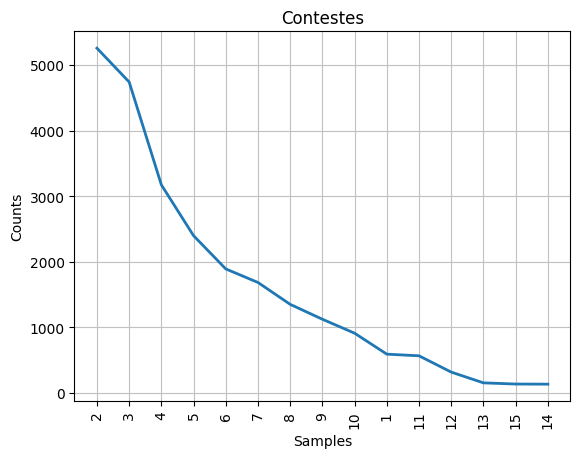

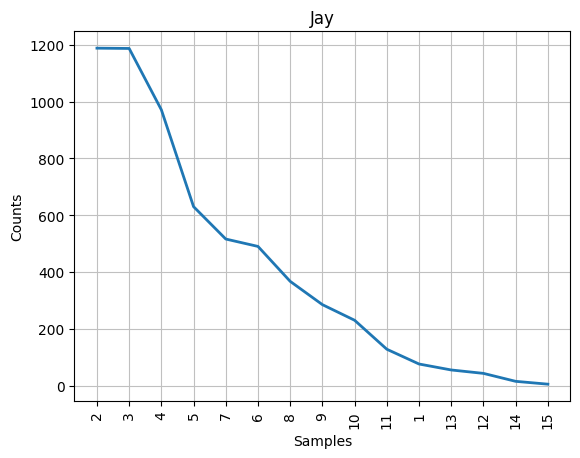

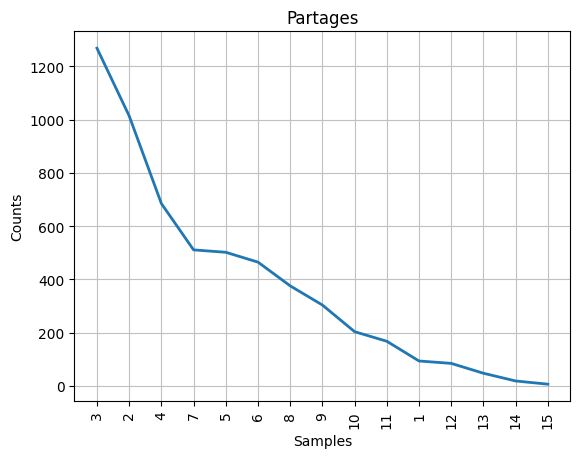

In [23]:
import matplotlib.pyplot as plt

for auteur in federalist_par_auteur_occs:
    occs_longueurs = [len(occ) for occ in federalist_par_auteur_occs[auteur]]
    federalist_par_auteur_dist_longueurs[auteur] = nltk.FreqDist(occs_longueurs)

    plt.figure()
    federalist_par_auteur_dist_longueurs[auteur].plot(15, title=auteur)
    plt.show()

Chaque graphique montre, pour un auteur donné, quelles **longueurs de mots** reviennent le plus souvent.

C'est un premier indicateur stylométrique :
certains auteurs ont tendance à utiliser plus de mots courts, d'autres plus de mots longs, ce qui peut refléter :

- un style plus "simple" ou plus "dense"

- un vocabulaire différent

- des habitudes de ponctuation/tokenisation (ex. contractions) qui influent aussi sur la longueur des tokens

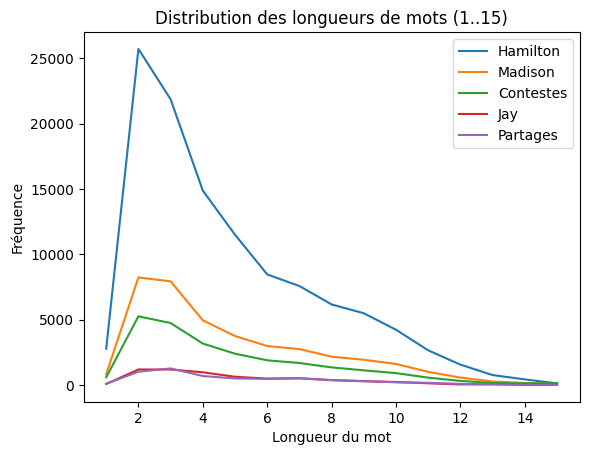

In [24]:
import numpy as np

max_len = 15

plt.figure()

for auteur in federalist_par_auteur_occs:
    occs_longueurs = [len(occ) for occ in federalist_par_auteur_occs[auteur]]
    fd = nltk.FreqDist(occs_longueurs)

    x = np.arange(1, max_len+1)
    y = [fd[i] for i in x]
    plt.plot(x, y, label=auteur)

plt.title("Distribution des longueurs de mots (1..15)")
plt.xlabel("Longueur du mot")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

Contrairement à `FreqDist.plot()` (qui produit un graphique par auteur), la cellule qui précède construit **un seul graphique** où chaque auteur est tracé comme **une courbe distincte**, avec une **légende**. C'est particulièrement utile pour comparer visuellement les profils.

1) Ce que dit la forme générale

Le pic très fort en longueur 2–3 est normal en anglais : énormément de mots-outils sont courts ("of", "to", "in", etc.).

Ensuite, la fréquence décroît quand la longueur augmente : les mots longs sont naturellement plus rares.

Donc, globalement, toutes les courbes “descendent” après 3–4 : c'est attendu.

2) Pourquoi Hamilton écrase tout (et pourquoi il faut être prudent)

Sur le graphe, la courbe Hamilton est beaucoup plus haute que les autres partout. La raison la plus probable n'est pas "Hamilton écrit différemment", mais simplement :

On trace des fréquences brutes (des comptages).
Si Hamilton a plus de texte / plus de tokens dans ton corpus, sa courbe sera mécaniquement plus haute.

Dans l'état, le graphique dit surtout : "j'ai plus de mots chez Hamilton".

In [12]:
auteurs = ["Hamilton","Madison"]

Cette cellule applique une **normalisation** très classique en stylométrie : convertir chaque token en **minuscules**. Sans cette étape, la casse (majuscule/minuscule) créerait des "mots" distincts alors qu'ils représentent le même item lexical.

In [13]:
for auteur in auteurs:
    federalist_par_auteur_occs[auteur] = (
        [occ.lower() for occ in federalist_par_auteur_occs[auteur]])

La cellule suivante fait la même normalisation que précédemment (passage en minuscules), mais **uniquement** pour la clé `"Contestes"` du dictionnaire.

In [14]:
federalist_par_auteur_occs["Contestes"] = (
    [occ.lower() for occ in federalist_par_auteur_occs["Contestes"]])


La cellule ensuite calcule, pour chaque auteur candidat (Hamilton, Madison, Jay, …), une mesure de **distance statistique** entre :
- le corpus de cet auteur,
- et le corpus des textes **"Contestes"** (attribution incertaine).

L'idée : si la distribution des mots dans “Contestes” ressemble à celle d'un auteur, alors l'écart mesuré par χ² sera **plus faible** (dans l'approche du notebook).


Globalement l'idée ici :

- plus χ² est faible, plus les textes "Contestes" ont une distribution de mots proche de celle de l'auteur,

- plus χ² est élevé, plus ils s'en éloignent.

Autrement dit : le "meilleur candidat" est souvent celui qui minimise χ².

In [15]:
for auteur in auteurs:

    corpus_combine = (federalist_par_auteur_occs[auteur] +
                      federalist_par_auteur_occs["Contestes"])
    corpus_combine_freq_dist = nltk.FreqDist(corpus_combine)
    mots_communs = list(corpus_combine_freq_dist.most_common(500))

    portion_candidat = (len(federalist_par_auteur_occs[auteur])
                      / len(corpus_combine))

    khicarre = 0
    for mot,occs_corpus_combine in mots_communs:

        auteur_occs = federalist_par_auteur_occs[auteur].count(mot)
        contestes_occs = federalist_par_auteur_occs["Contestes"].count(mot)

        auteur_occs_attendues = occs_corpus_combine * portion_candidat
        contestes_occs_attendues = occs_corpus_combine * (1-portion_candidat)

        khicarre += ((auteur_occs-auteur_occs_attendues) *
                     (auteur_occs-auteur_occs_attendues) /
                    auteur_occs_attendues)

        khicarre += ((contestes_occs-contestes_occs_attendues) *
                     (contestes_occs-contestes_occs_attendues)
                       / contestes_occs_attendues)

    print("Le khi carré mesuré pour le candidat", auteur, "est", khicarre)

Le khi carré mesuré pour le candidat Hamilton est 3434.6850314768426
Le khi carré mesuré pour le candidat Madison est 1907.5992915766838


In [16]:
auteurs = ["Hamilton", "Madison", "Jay", "Contestes", "Partages"]

for auteur in auteurs:
    federalist_par_auteur_occs[auteur] = (
        [occ.lower() for occ in federalist_par_auteur_occs[auteur]])

corpus_entier = []
for auteur in auteurs:
    corpus_entier += federalist_par_auteur_occs[auteur]

corpus_entier_freq_dist = list(nltk.FreqDist(corpus_entier).most_common(30))
corpus_entier_freq_dist[ :10 ]

[('the', 17846),
 ('of', 11796),
 ('to', 7012),
 ('and', 5016),
 ('in', 4408),
 ('a', 3967),
 ('be', 3770),
 ('that', 2747),
 ('it', 2520),
 ('is', 2178)]

L'objectif de la cellule suivante est de transformer chaque sous-corpus (Hamilton, Madison, Jay, Contestes, Partages) en un **profil numérique comparable** : un ensemble de "traits" (features) correspondant à la **fréquence relative** de certains mots (souvent des mots-outils).

In [17]:
traits = [mot for mot,freq in corpus_entier_freq_dist]
traits_freqs = {}

for auteur in auteurs:
    traits_freqs[auteur] = {}

    en_tout = len(federalist_par_auteur_occs[auteur])

    for trait in traits:
        presence = federalist_par_auteur_occs[auteur].count(trait)
        traits_freqs[auteur][trait] = presence / en_tout


### Standardiser les “traits” : moyenne et écart-type par mot (sur l'ensemble des auteurs)

Cette cellule prépare une étape classique en stylométrie (notamment pour **Burrows' Delta**) : calculer, pour chaque trait (mot fréquent), sa **moyenne** et son **écart-type** à l'échelle du corpus.

L'idée : certains mots ("the", "of", …) sont naturellement beaucoup plus fréquents que d'autres.  
Pour comparer proprement des profils, on veut exprimer chaque trait en **valeur standardisée** (z-score), donc on a besoin de :
- la **moyenne** du trait,
- l'**écart-type** du trait.
<br>On calcule l'écart-type “classique” (estimateur sur échantillon) :

- On mesure l'écart de chaque auteur à la moyenne (diff).

- On somme les carrés des écarts (diff*diff).

- On divise par len(auteurs) - 1 :

  - c'est la variance échantillonnale (correction de Bessel).

- On prend la racine carrée → écart-type.

**Résultat** : à quel point la fréquence de ce mot varie selon les auteurs.
<br><br>Ainsi :

- on met tous les mots sur une même échelle,

- un mot rare mais très discriminant peut compter autant qu'un mot très fréquent,

- on prépare une distance robuste pour comparer des profils (ex. Burrows' Delta).


In [18]:
import math

corpus_traits = {}

for trait in traits:
    corpus_traits[trait] = {}

    trait_moyenne = 0
    for auteur in auteurs:
        trait_moyenne += traits_freqs[auteur][trait]
    trait_moyenne /= len(auteurs)
    corpus_traits[trait]["Moyenne"] = trait_moyenne

    trait_ecart_type = 0
    for auteur in auteurs:
        diff = traits_freqs[auteur][trait] - corpus_traits[trait]["Moyenne"]
        trait_ecart_type += diff*diff
    trait_ecart_type /= (len(auteurs) - 1)
    trait_ecart_type = math.sqrt(trait_ecart_type)
    corpus_traits[trait]["EcartType"] = trait_ecart_type


Cette cellule convertit, pour chaque auteur et pour chaque trait (mot fréquent), la fréquence relative en **score z** (aussi appelé *z-score*).  
C'est une étape clé avant de calculer des distances stylométriques comme **Burrows' Delta**.
<br>Une fois que chaque auteur est représenté par un vecteur de z-scores :

- on peut calculer des distances entre auteurs,

- comparer un texte inconnu (ici “Contestes”) aux profils connus,

- et produire une attribution en fonction de la proximité.

C'est exactement l'esprit de Burrows' Delta : comparer des styles à partir de mots fréquents, mais sur une échelle standardisée.

In [19]:
traits_cotes_z = {}
for auteur in auteurs:
    traits_cotes_z[auteur] = {}
    for trait in traits:

        trait_valeur = traits_freqs[auteur][trait]
        trait_moyenne = corpus_traits[trait]["Moyenne"]
        trait_ecart_type = corpus_traits[trait]["EcartType"]
        traits_cotes_z[auteur][trait] = ((trait_valeur-trait_moyenne) /
                                          trait_ecart_type)


Cette cellule applique au texte `CasSpecial` exactement la même chaîne de traitement que pour les auteurs, afin de pouvoir le comparer à eux sur une base commune.

Ici, `CasSpecial` correspond (ici) à un texte particulier — **Federalist 64** — qu'on veut considérer comme un "cas à attribuer" ou à rapprocher des profils existants.

On affiche, pour chaque mot fréquent, à quel point CasSpecial l’utilise plus ou moins que la moyenne du corpus :

- z positif : le mot est sur-utilisé dans CasSpecial

- z négatif : le mot est sous-utilisé

- |z| élevé : trait potentiellement très caractéristique

In [20]:
cas_special_occs = nltk.word_tokenize(federalist_par_auteur["CasSpecial"])

cas_special_occs = [occ.lower() for occ in cas_special_occs
                   if any (c.isalpha() for c in occ)]

en_tout = len(cas_special_occs)
cas_special_freqs = {}
for trait in traits:
    presence = cas_special_occs.count(trait)
    cas_special_freqs[trait] = presence / en_tout

cas_special_cotes_z = {}
for trait in traits:
    trait_valeur = cas_special_freqs[trait]
    trait_moyenne = corpus_traits[trait]["Moyenne"]
    trait_ecart_type = corpus_traits[trait]["EcartType"]
    cas_special_cotes_z[trait] = (trait_valeur - trait_moyenne) / trait_ecart_type
    print( "Cote Z du Federalist 64 pour le trait", trait, "=",
          cas_special_cotes_z[trait])

Cote Z du Federalist 64 pour le trait the = -0.7692828380408238
Cote Z du Federalist 64 pour le trait of = -1.8167784558461264
Cote Z du Federalist 64 pour le trait to = 1.032705844508835
Cote Z du Federalist 64 pour le trait and = 1.0268752924746058
Cote Z du Federalist 64 pour le trait in = 0.6085448502160903
Cote Z du Federalist 64 pour le trait a = -0.9341289591084886
Cote Z du Federalist 64 pour le trait be = 1.0279650702511498
Cote Z du Federalist 64 pour le trait that = 1.7937385529385421
Cote Z du Federalist 64 pour le trait it = -0.13459361853279056
Cote Z du Federalist 64 pour le trait is = -0.9061542167373068
Cote Z du Federalist 64 pour le trait which = -2.059010144513673
Cote Z du Federalist 64 pour le trait by = 1.1019070073046568
Cote Z du Federalist 64 pour le trait as = 4.9191578751913125
Cote Z du Federalist 64 pour le trait this = -1.2530109173143964
Cote Z du Federalist 64 pour le trait not = 0.7961288069167818
Cote Z du Federalist 64 pour le trait would = -0.831973

Et enfin cette cellule met en œuvre l'idée centrale de **Burrows' Delta** : mesurer à quel point le texte "inconnu" (`CasSpecial`, ici Federalist 64) est proche du style de chaque auteur, à partir des **scores z** des mots fréquents.

In [21]:
for auteur in auteurs:
    delta = 0
    for trait in traits:
        delta += math.fabs((cas_special_cotes_z[trait] -
                            traits_cotes_z[auteur][trait]))
    delta /= len(traits)
    print( "Cote Delta du candidat", auteur, "est", delta )

Cote Delta du candidat Hamilton est 1.768470453004334
Cote Delta du candidat Madison est 1.6089724119682816
Cote Delta du candidat Jay est 1.5345768956569326
Cote Delta du candidat Contestes est 1.5371768107570636
Cote Delta du candidat Partages est 1.846113566619675


Ça veut dire que, sur les "traits" choisis (mots fréquents) et avec la standardisation en z-scores, le texte CasSpecial (Federalist 64) est le plus proche du profil Jay, parce que c'est lui qui a la Delta la plus faible.